# Project: Topic Modeling and Sentiment Analysis on Twitter Data

## **Objective **
### Social Media Tweet Analysis on Twitter Dataset
*   Topic Modeling on Twitter Dataset
*   Sentiment analysis on Twitter Dataset

### **Topic modeling**
Topic modeling is a type of statistical model for discovering the abstract "topics" that occur in a collection of texts.


*   The task here is to discover abstract topics from tweets.


### **Sentiment analysis**
 It is used in social media monitoring, allowing businesses to gain insights about how customers feel about certain topics, and detect urgent issues in real time before they spiral out of control.


*   The task here is to classify a tweet as a positive or negative tweet sentiment wise.

## Data Understanding
### Loading necessary packages

In [162]:
import json
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS,WordCloud
from gensim import corpora
import pandas as pd
import string
import re
from textblob import TextBlob

In [163]:
def read_json(json_file: str)->list:
    """
    json file reader to open and read json files into a list
    Args:
    -----
    json_file: str - path of a json file
    
    Returns
    -------
    length of the json file and a list of json
    """
    
    tweets_data = []
    for tweets in open(json_file,'r'):
        tweets_data.append(json.loads(tweets))
    
    return len(tweets_data), tweets_data


In [164]:
class TweetDfExtractor:
    """
    this function will parse tweets json into a pandas dataframe
    
    Return
    #------
    dataframe
    """
    def __init__(self, tweets_list):
        
        self.tweets_list = tweets_list

        
    def find_full_text(self)->list:
        text = []
        for element in self.tweets_list:
            if 'retweeted_status' in element:
                if 'extended_tweet' in element['retweeted_status']:
                    text.append(element['retweeted_status']['extended_tweet']['full_text'])
                else:
                    text.append(element['retweeted_status']['text'])
            else:
                try:

                    if 'extended_tweet' in element['quoted_status']:
                        text.append(element['quoted_status']['extended_tweet']['full_text'])
                    else:
                        text.append(element['quoted_status']['text'])
                except:
                    text.append(element['text'])


        return text
    

    def find_created_time(self)->list:
        created_at = [] # Initialize empty list
        for element in self.tweets_list:
            if 'retweeted_status' in element:
                created_at.append(element['retweeted_status']['created_at'])
                    
            else:
                created_at.append(element['created_at'])

        return created_at

    

    def is_sensitive(self)->list:
        is_sensitive = []
        for element in self.tweets_list:
            if 'retweeted_status' in element:
                try:
                    is_sensitive.append(element['retweeted_status']['possibly_sensitive'])
                except:
                    is_sensit = None
                    is_sensitive.append(is_sensit)
            else:
                is_sensit = None
                is_sensitive.append(is_sensit)

        return is_sensitive

    

    def find_lang(self)->list:
        lang = []
        for element in self.tweets_list:
            if 'lang' in element:
                lang.append(element['lang'])
                    
            else:
                lang = None
                
        return lang
    
    def find_tweet_id(self)->list:
        tweet_id = []
        for element in self.tweets_list:
            if 'lang' in element:
                tweet_id.append(element['id'])
                    
            else:
                tweet_id = None
                
        return tweet_id

    
        
        
    def get_tweet_df(self, save=False)->pd.DataFrame:
        """required column to be generated you should be creative and add more features"""
        
        columns = ['created_at', 'tweet_id','cleaned_text', 'lang','possibly_sensitive']
        
        created_at = self.find_created_time()
#         print(len(created_at))
        text = self.find_full_text()
#         print(len(text))
        lang = self.find_lang()
#         print(len(lang))
        tweet_id = self.find_tweet_id()
#         print(tweet_id[:50])
        sensitivity = self.is_sensitive()
#         print(len(sensitivity))
        data = zip(created_at, tweet_id, text, lang, sensitivity)

        df = pd.DataFrame(data=data, columns=columns)
        if True:
            df.to_csv('processed_tweet_data.csv', index=False)
            print('File Successfully Saved.!!!')
        
        return df

                

# required column to be generated you should be creative and add more features
columns = ['created_at', 'original_text','cleaned_text', 'sentiment','polarity','subjectivity', 'lang','possibly_sensitive']
tweet_len, tweet_list = read_json("data/covid19.json")
tweet_list[:1]
tweet = TweetDfExtractor(tweet_list)
tweet_df = tweet.get_tweet_df() 
tweet_df.head()
# use all defined functions to generate a dataframe with the specified columns above

File Successfully Saved.!!!


,created_at,tweet_id,cleaned_text,lang,possibly_sensitive
0,Thu Jun 17 16:18:28 +0000 2021,1405947374003015684,"🚨Africa is ""in the midst of a full-blown third...",en,False
1,Fri Jun 18 16:40:24 +0000 2021,1405947412364075010,"Dr Moeti is head of WHO in Africa, and one of ...",en,False
2,Fri Jun 18 17:45:27 +0000 2021,1405947447797587969,Thank you @research2note for creating this ama...,en,None
3,Wed Jun 16 00:21:22 +0000 2021,1405947462028873729,"Former Pfizer VP and Virologist, Dr. Michael Y...",en,False
4,Fri Jun 18 13:34:47 +0000 2021,1405947503225229317,I think it’s important that we don’t sell COVA...,en,None


In [165]:
#To get information abou the data
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6532 entries, 0 to 6531
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   created_at          6532 non-null   object
 1   tweet_id            6532 non-null   int64 
 2   cleaned_text        6532 non-null   object
 3   lang                6532 non-null   object
 4   possibly_sensitive  3618 non-null   object
dtypes: int64(1), object(4)
memory usage: 255.3+ KB


In [166]:
# Dropping Non-english texts
indices = tweet_df.loc[tweet_df['lang']!='en'].index
tweet_df.drop(indices, inplace=True)
tweet_df=tweet_df.reset_index(drop=True)
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6532 entries, 0 to 6531
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   created_at          6532 non-null   object
 1   tweet_id            6532 non-null   int64 
 2   cleaned_text        6532 non-null   object
 3   lang                6532 non-null   object
 4   possibly_sensitive  3618 non-null   object
dtypes: int64(1), object(4)
memory usage: 255.3+ KB


In [ ]:
# Removing Duplicates


In [167]:
# Determining None values in data

print("The number of missing value(s): {}".format(tweet_df.isnull().sum().sum()))
print("Columns having columns value:{}".format(tweet_df.columns[tweet_df.isnull().any()]))

The number of missing value(s): 2914
Columns having columns value:Index(['possibly_sensitive'], dtype='object')


In [168]:
class CleanedTextProcessing:
  def __init__(self,df):
    self.df=df
    
  def preprocess_cleaned_text(self):
    
    #text Preprocessing
    tweet_df['cleaned_text']=tweet_df['cleaned_text'].astype(str)
    tweet_df['cleaned_text'] = tweet_df['cleaned_text'].apply(lambda x: x.lower())
    tweet_df['cleaned_text']= tweet_df['cleaned_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))
    
    #Converting tweets to list of words For feature engineering
    sentence_list = [tweet for tweet in tweet_df['cleaned_text']]
    word_list = [sent.split() for sent in sentence_list]

    #Create dictionary which contains Id and word 
    word_to_id = corpora.Dictionary(word_list)
    corpus_1= [word_to_id.doc2bow(tweet) for tweet in word_list]



    
    return tweet_df, word_list, word_to_id, corpus_1


In [169]:
PrepareData_obj=CleanedTextProcessing(tweet_df)
tweet_df, word_list ,id2word,corpus=PrepareData_obj.preprocess_cleaned_text()

[['🚨africa', 'is', 'in', 'the', 'midst', 'of', 'a', 'fullblown', 'third', 'wave', 'of', 'coronavirus', 'the', 'head', 'of', 'whoafro', 'has', 'warned', 'cases', 'have', 'risen', 'across', 'the', 'continent', 'by', 'more', 'than', '20', 'and', 'deaths', 'have', 'also', 'risen', 'by', '15', 'in', 'the', 'last', 'week', 'jriggers', 'reports', '🧵', 'httpstcocrdhqphfwm'], ['dr', 'moeti', 'is', 'head', 'of', 'who', 'in', 'africa', 'and', 'one', 'of', 'the', 'best', 'public', 'health', 'experts', 'and', 'leaders', 'i', 'know', 'hers', 'is', 'a', 'desperate', 'request', 'for', 'vaccines', 'to', 'africa', 'we', 'plead', 'with', 'germany', 'and', 'the', 'uk', 'to', 'lift', 'patent', 'restrictions', 'and', 'urgently', 'transfer', 'technology', 'to', 'enable', 'production', 'in', 'africa', 'httpstcosogiroihoc']]
Dictionary(10341 unique tokens: ['15', '20', 'a', 'across', 'also']...)


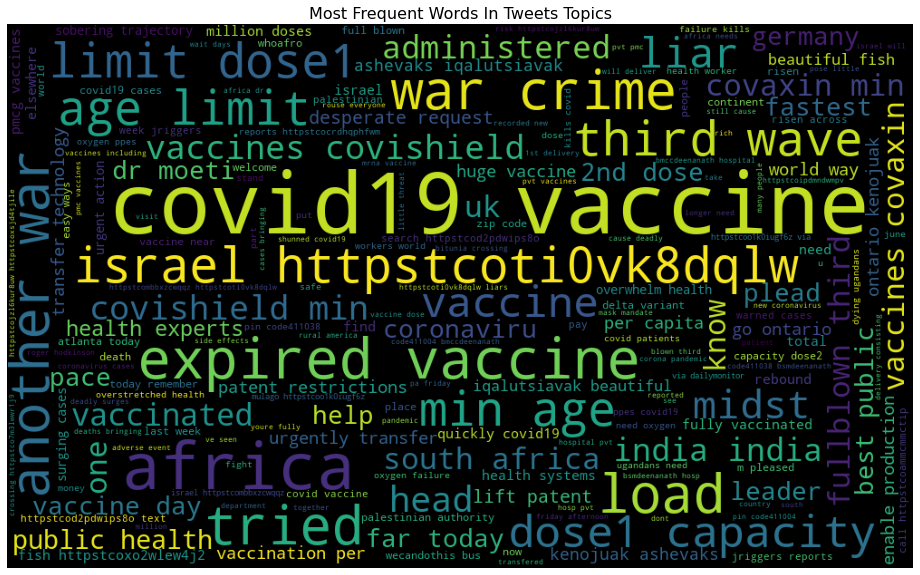

In [172]:
# Results of Cleaned_text processing
# print(corpus)
print(word_list[:2])
print(id2word)

# Ploting Occurence of Words

plt.figure(figsize=(20, 10))
plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(tweet_df.cleaned_text .values)))
plt.axis('off')
plt.title('Most Frequent Words In Tweets Topics',fontsize=16)
plt.show()

## Topic Modeling Using Natural Language Processing

### Model Used: Latent Dirichlet Allocation

According to distributional hypothesis, (i.e. similar topics make use of similar words) and the statistical mixture hypothesis (i.e. documents talk about several topics) for which a statistical distribution can be determined. 

--> The purpose of LDA is mapping each teweets in our corpus to a set of topics which covers a good deal of the words in the tweet

In [173]:
# Importing Necessary packages
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
from pprint import pprint
import re

In [174]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [149]:
# Showing Topics
pprint(lda_model.show_topics(formatted=False))

[(0,
  [('vaccines', 0.032263555),
   ('age', 0.024298357),
   ('capacity', 0.023284802),
   ('dose1', 0.022089638),
   ('min', 0.022089638),
   ('pin', 0.022089638),
   ('limit', 0.022089638),
   ('covaxin', 0.018762687),
   ('to', 0.017852047),
   ('the', 0.015124568)]),
 (1,
  [('the', 0.05904565),
   ('of', 0.04670784),
   ('india', 0.034666907),
   ('in', 0.03077423),
   ('africa', 0.023735823),
   ('to', 0.021278383),
   ('covid19', 0.019526204),
   ('is', 0.017535241),
   ('a', 0.016430384),
   ('and', 0.015595473)]),
 (2,
  [('the', 0.043014195),
   ('to', 0.039461844),
   ('covid19', 0.030880341),
   ('vaccines', 0.023449393),
   ('of', 0.022783972),
   ('in', 0.018389795),
   ('are', 0.018339787),
   ('amp', 0.014665315),
   ('and', 0.01390819),
   ('with', 0.012017919)]),
 (3,
  [('and', 0.037099864),
   ('to', 0.032912906),
   ('the', 0.023691649),
   ('africa', 0.019669373),
   ('in', 0.01809949),
   ('vaccines', 0.017910507),
   ('covid19', 0.017458482),
   ('of', 0.01644

* Each line is a topic with individual topic terms and weights. Topic1 (Indexed 0 above)  can be termed as Indian Vaccine known as "covaxin" describing the dosage, age and capacity, Topic2 (indexed 1 above) can be termed as Covid19 Vaccines and Topic4 (indexed 3 above) can be termed as Covid19 Vaccination in Africa.

# **Tweet Topic Model Analysis**

Perplexity is also a measure of model quality and in natural language processing is often used as “perplexity per number of words”. It describes how well a model predicts a sample, i.e. how much it is “perplexed” by a sample from the observed data. The lower the score, the better the model for the given data.

A coherence matrix is used to test the model for accuracy. Topic coherence is a measure that compares different topic models based on their human-interpretability. The coherence score ‘C_V’ provides a numerical value to the interpretability of the topics

In [175]:
# Compute Perplexity

#It's a measure of how good the model is. The lower the better. Perplexity is a negative value
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
doc_lda = lda_model[corpus]


# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n Ldamodel Coherence Score/Accuracy on Tweets Topic Modeling: ', coherence_lda)


Perplexity:  -6.532025244371065

 Ldamodel Coherence Score/Accuracy on Tweets Topic Modeling:  0.5050434234621697


* > Basic Ldamodel Coherence Score 0.505, This means that the model has performed reasonably well in Tweet topic modeling.

### Analyising How Topics relates to each Other using pyLDAvis Package
Anlayizing results Exploring the Intertopic Distance Plot, helps to learn about how topics relate to each other, including potential higher-level structure between groups of topics

In [179]:
# Importing pyLDAvis package

import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
# LDAvis_prepared
pyLDAvis.display(LDAvis_prepared)

FileNotFoundError: [Errno 2] No such file or directory: 'https://cdn.jsdelivr.net/gh/bmabey/pyLDAvis@3.3.1/pyLDAvis/js/ldavis.v1.0.0.css'

## Conclusion on Topic Modelling

On the Diagram above shows that Topic1 which can be described as "Indian Vaccine known as 'covaxin' describing the dosage, age and capacity" and Topic3 that can be described as "Covid19 Vaccines", are related.